# 선형회귀 분석

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline  

In [5]:
# 단순선형회귀 모델 만들기

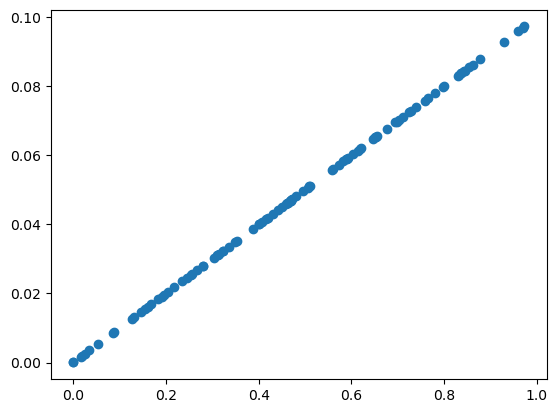

In [6]:
x = np.random.rand(100)         
y =0.2 * x * 0.5 #ax+5

plt.scatter(x,y)

In [7]:
def plt_prediction(pred,y):
    plt.figure(figsize=(8,6))
    plt.scatter(x,y,color='blue', label='Actual')

In [8]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, color='blue', label='Actual')
    plt.scatter(x, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

In [9]:
# 경사하강법 y=wx+b, w결정
w = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learning_rate = 0.5 #임의 값



Epoch 0, W: 0.8456, Error:0.3522


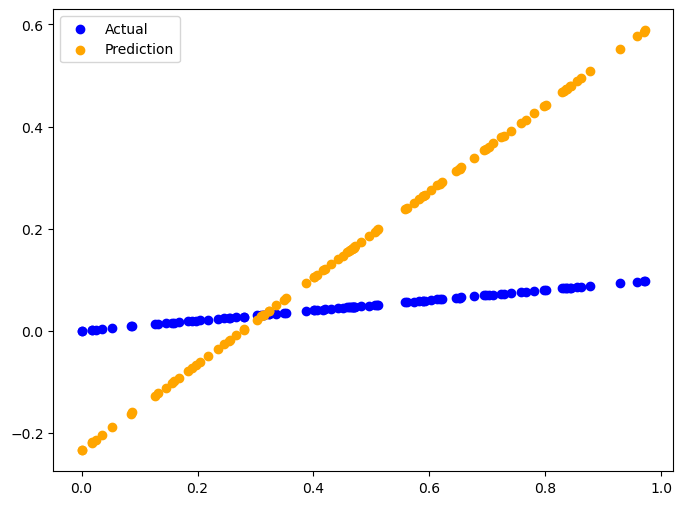

Epoch 10, W: 0.6238, Error:0.1175


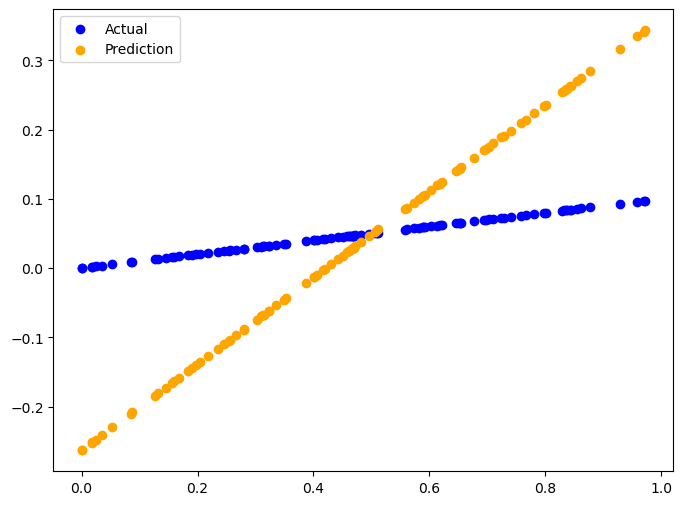

Epoch 20, W: 0.4982, Error:0.0893


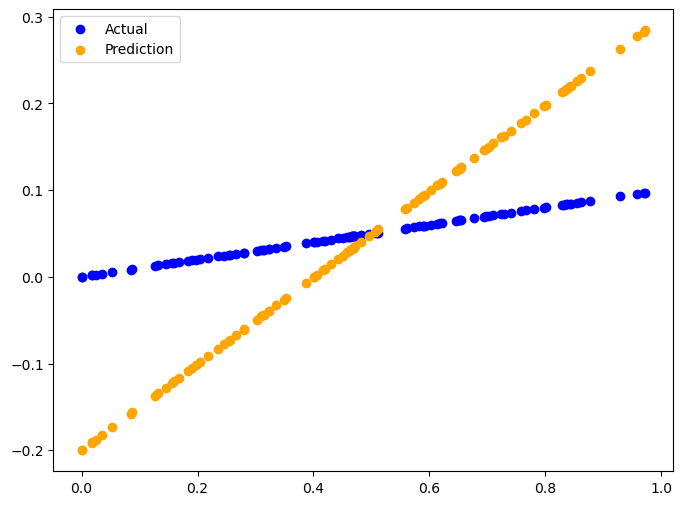

Epoch 30, W: 0.4026, Error:0.0679


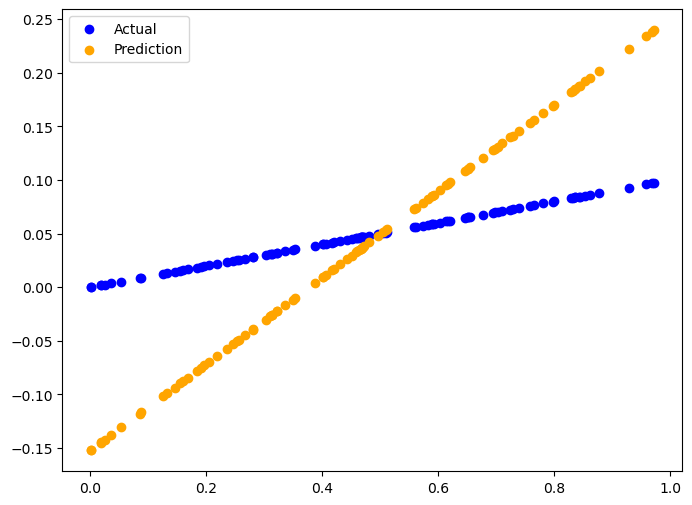

Epoch 40, W: 0.3300, Error:0.0516


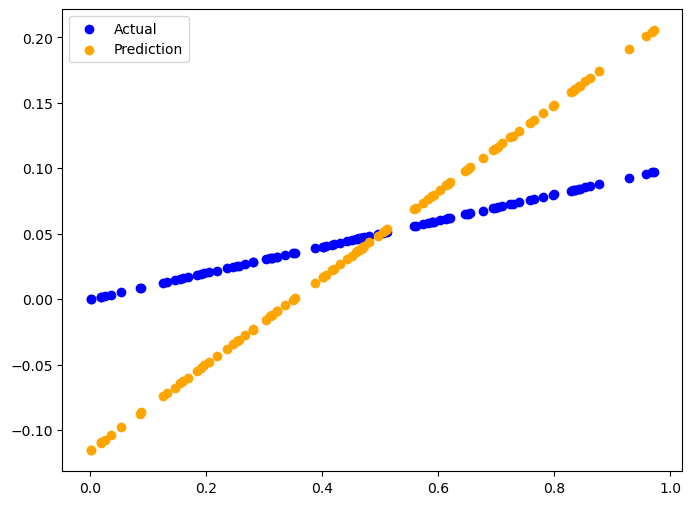

Epoch 50, W: 0.2748, Error:0.0392


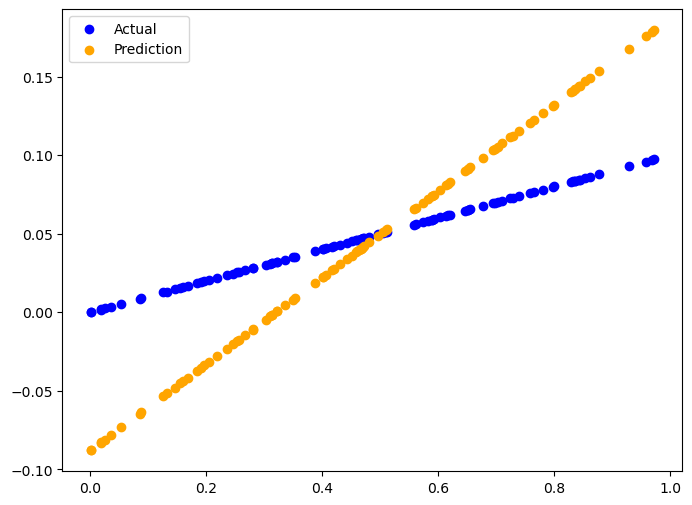

Epoch 60, W: 0.2329, Error:0.0298


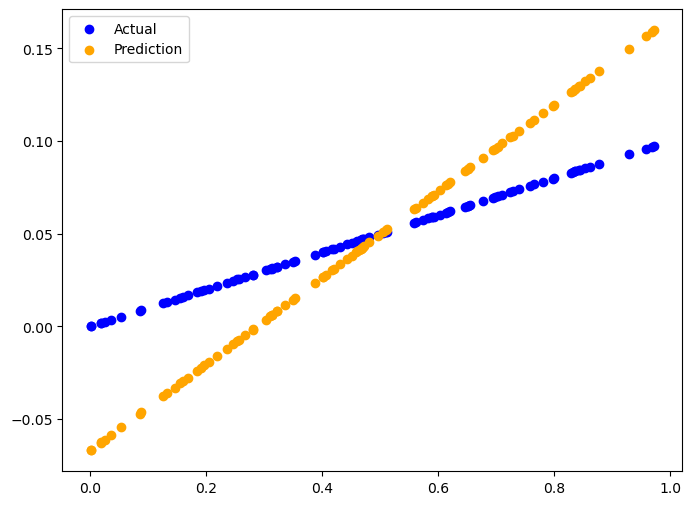

Epoch 70, W: 0.2010, Error:0.0226


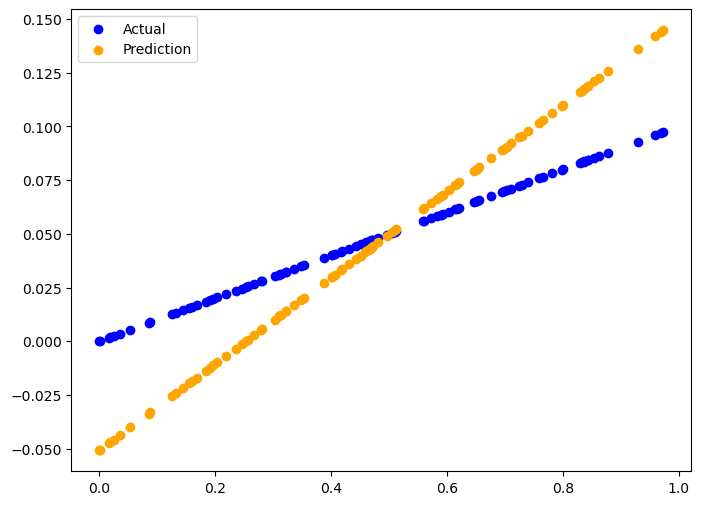

Epoch 80, W: 0.1768, Error:0.0172


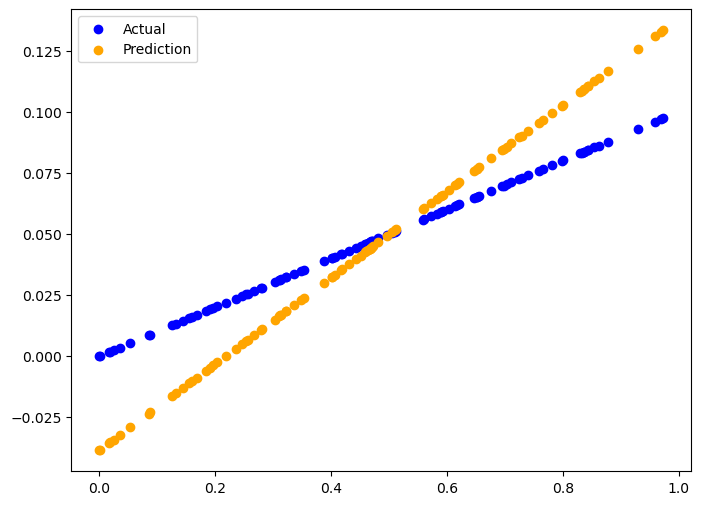

Epoch 90, W: 0.1584, Error:0.0131


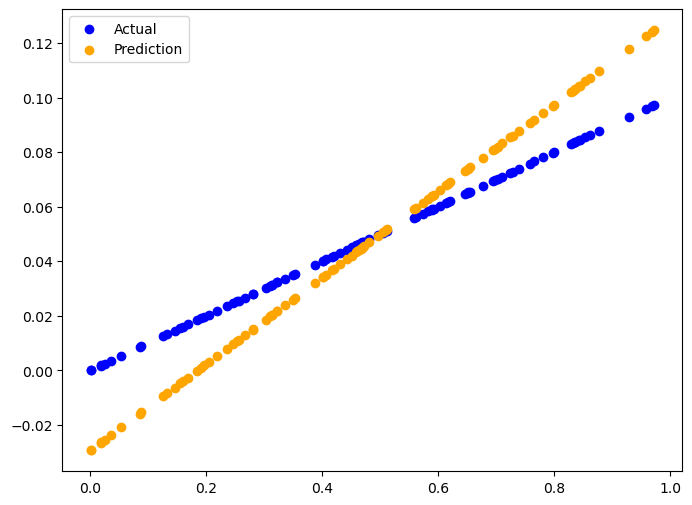

In [10]:
for epoch in range(100):
    y_pred = w*x + b
    error = np.abs(y_pred - y).mean()
    
    if error < 0.001 : 
        break
    w_descent = learning_rate * ((y_pred - y)*x).mean()
    b_descent = learning_rate * ((y_pred - y).mean())
    
    w = w - w_descent
    b = b - b_descent
    
    if epoch%10 == 0 :
        print(f'Epoch {epoch}, W: {w:.4f}, Error:{error:.4f}')
        y_pred = w * x + b 
        plt_prediction(y_pred, y)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib



Using matplotlib backend: inline


In [12]:
bostonDF = pd.read_csv('data/boston.csv')
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [13]:
X = bostonDF.drop('target', axis=1).values
y = bostonDF['target'].values
bostonDF.shape

(506, 14)

bostonDF.head()

<details>
<summary> 컬럼 설명</summary>

| 컬럼명         | 설명                                                       |
| ----------- | -------------------------------------------------------- |
| **CRIM**    | 자치시(per capita)당 범죄율                                     |
| **ZN**      | 25,000 평방피트를 초과하는 주거용 토지 비율(%)                           |
| **INDUS**   | 비소매 상업지역 면적 비율                                           |
| **CHAS**    | 찰스강(Charles River) 인접 여부 (1: 인접, 0: 비인접)                 |
| **NOX**     | 일산화질소 농도 (parts per 10 million)                          |
| **RM**      | 주택 1가구당 평균 방 수                                           |
| **AGE**     | 1940년 이전에 건축된 주택 비율                                      |
| **DIS**     | 5개 보스턴 고용센터까지의 거리 가중치 합 (접근성)                            |
| **RAD**     | 방사형 도로 접근성 지수                                            |
| **TAX**     | 10,000달러당 재산세율                                           |
| **PTRATIO** | 학생/교사 비율                                                 |
| **B**       | 흑인 인구 비율을 기반으로 만든 지표 (공식: 1000(Bk - 0.63)^2, Bk는 흑인의 비율) |
| **LSTAT**   | 저소득층 비율 (%)                                              |
| **target**  | 주택 가격 (1,000달러 단위)   
                                    |
</details>


In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(xtrain, ytrain)
y_pred = lr.predict(xtest)
y_pred[:3]

array([23.15424087, 19.65590246, 36.42005168])

In [15]:
# 평가
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
rmse, mse

(np.float64(4.158956107955705), np.float64(17.296915907902065))

In [16]:
# 결정계수 
r2_score(ytest, y_pred)

np.float64(0.7572263323138934)

In [17]:
#회귀식
# w1, w0(편향)

lr.intercept_, lr.coef_ # intercept = w1, coef = w0

(np.float64(40.99559517216439),
 array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
        -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
         3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
        -5.66182106e-01]))

y = w0 + w1*x1 + w2*x2 + .... w13*x13

In [19]:
np.round(lr.intercept_, 1), np.round(lr.coef_,1)

(np.float64(41.0),
 array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
         -0. ,  -0.9,   0. ,  -0.6]))

In [20]:
pd.Series(data= np.round(lr.coef_,1), index=bostonDF.drop('target', axis=1).columns).sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
B           0.0
TAX        -0.0
AGE         0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [21]:
# 교차 검증
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5) # neg는 거꾸로
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [23]:
# mse, rmse, R2(얘는 따로 계산해야 한다고 함)

RMSE = np.sqrt(neg_mse_scores*-1)
np.mean(RMSE), RMSE

(np.float64(5.828658946215813),
 array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405]))

In [28]:
# R2
r2_score_scores = cross_val_score(lr, X, y, scoring='r2', cv=5)
r2_score_scores, np.mean(r2_score_scores)

(array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154]),
 np.float64(0.3532759243958839))

In [ ]:
오차는 작고(4.15 > 5.82), 결정계수는 작아진 결과 

<details>
<summary> 컬럼 설명</summary>

| 컬럼명         | 설명                                                       |
| ----------- | -------------------------------------------------------- |
| **CRIM**    | 자치시(per capita)당 범죄율                                     |
| **ZN**      | 25,000 평방피트를 초과하는 주거용 토지 비율(%)                           |
| **INDUS**   | 비소매 상업지역 면적 비율                                           |
| **CHAS**    | 찰스강(Charles River) 인접 여부 (1: 인접, 0: 비인접)                 |
| **NOX**     | 일산화질소 농도 (parts per 10 million)                          |
| **RM**      | 주택 1가구당 평균 방 수                                           |
| **AGE**     | 1940년 이전에 건축된 주택 비율                                      |
| **DIS**     | 5개 보스턴 고용센터까지의 거리 가중치 합 (접근성)                            |
| **RAD**     | 방사형 도로 접근성 지수                                            |
| **TAX**     | 10,000달러당 재산세율                                           |
| **PTRATIO** | 학생/교사 비율                                                 |
| **B**       | 흑인 인구 비율을 기반으로 만든 지표 (공식: 1000(Bk - 0.63)^2, Bk는 흑인의 비율) |
| **LSTAT**   | 저소득층 비율 (%)                                              |
| **target**  | 주택 가격 (1,000달러 단위)   
                                    |
</details>
